In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from pandas import read_csv

import tensorflow as tf
import numpy as np

dataframe = read_csv('weather@beijing_5years.csv', usecols = [6,7,8,10]) # TEMP 데이터 예측
print(dataframe)

dataset = dataframe.values
dataset = dataset.astype('float')

print(dataset)
print(dataset.shape)

       DEWP  TEMP    PRES     Iws
0       -21 -11.0  1021.0    1.79
1       -21 -12.0  1020.0    4.92
2       -21 -11.0  1019.0    6.71
3       -21 -14.0  1019.0    9.84
4       -20 -12.0  1018.0   12.97
...     ...   ...     ...     ...
43819   -23  -2.0  1034.0  231.97
43820   -22  -3.0  1034.0  237.78
43821   -22  -3.0  1034.0  242.70
43822   -22  -4.0  1034.0  246.72
43823   -21  -3.0  1034.0  249.85

[43824 rows x 4 columns]
[[ -21.    -11.   1021.      1.79]
 [ -21.    -12.   1020.      4.92]
 [ -21.    -11.   1019.      6.71]
 ...
 [ -22.     -3.   1034.    242.7 ]
 [ -22.     -4.   1034.    246.72]
 [ -21.     -3.   1034.    249.85]]
(43824, 4)


In [39]:
train_data, test_data = train_test_split(dataset, test_size = 0.2, shuffle = False)
print(len(train_data), len(test_data))

# Select the columns for x
train_x = train_data[:,[0,2,3]] # TEMP 데이터 제외 (두번째 열)
test_x = test_data[:,[0,2,3]] # TEMP 데이터 제외 (두번째 열)

print(train_x)
print(train_x.shape)
print(test_x)
print(test_x.shape)

# Select the column for y(label)
train_y = train_data[:, 1] # TEMP 데이터 예측 (두번째 열)
test_y = test_data[:, 1] # TEMP 데이터 예측 (두번째 열)

print(train_y)
print(train_y.shape)
print(test_y)
print(test_y.shape)

35059 8765
[[ -21.   1021.      1.79]
 [ -21.   1020.      4.92]
 [ -21.   1019.      6.71]
 ...
 [ -18.   1012.     92.97]
 [ -19.   1012.    102.8 ]
 [ -19.   1013.    109.95]]
(35059, 3)
[[ -19.   1013.    114.87]
 [ -21.   1014.    119.79]
 [ -21.   1014.    125.6 ]
 ...
 [ -22.   1034.    242.7 ]
 [ -22.   1034.    246.72]
 [ -21.   1034.    249.85]]
(8765, 3)
[-11. -12. -11. ...   9.   8.   8.]
(35059,)
[ 7.  7.  7. ... -3. -4. -3.]
(8765,)


In [40]:
# Normalize features
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

scaled_train_x = scaler_x.fit_transform(train_x)
scaled_train_y = scaler_y.fit_transform(train_y.reshape(-1,1))
scaled_test_x = scaler_x.fit_transform(test_x)
scaled_test_y = scaler_y.fit_transform(test_y.reshape(-1,1))

print(scaled_train_x)
print(scaled_train_x.shape)
print(scaled_train_y)
print(scaled_train_y.shape)

[[0.19672131 0.54545455 0.00229001]
 [0.19672131 0.52727273 0.00763907]
 [0.19672131 0.50909091 0.01069811]
 ...
 [0.24590164 0.38181818 0.1581133 ]
 [0.2295082  0.38181818 0.17491242]
 [0.2295082  0.4        0.1871315 ]]
(35059, 3)
[[0.13333333]
 [0.11666667]
 [0.13333333]
 ...
 [0.46666667]
 [0.45      ]
 [0.45      ]]
(35059, 1)


In [25]:
# Create the model
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(scaled_train_x.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [26]:
# Train the model
history = model.fit(scaled_train_x, scaled_train_y, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
1096/1096 [==============================] - 1s 1ms/step - loss: 0.0258
Epoch 2/10
1096/1096 [==============================] - 1s 996us/step - loss: 0.0089
Epoch 3/10
1096/1096 [==============================] - 1s 1ms/step - loss: 0.0088
Epoch 4/10
1096/1096 [==============================] - 1s 1ms/step - loss: 0.0087
Epoch 5/10
1096/1096 [==============================] - 1s 1ms/step - loss: 0.0087
Epoch 6/10
1096/1096 [==============================] - 1s 1ms/step - loss: 0.0086
Epoch 7/10
1096/1096 [==============================] - 1s 995us/step - loss: 0.0085
Epoch 8/10
1096/1096 [==============================] - 1s 989us/step - loss: 0.0085
Epoch 9/10
1096/1096 [==============================] - 1s 1ms/step - loss: 0.0085
Epoch 10/10
1096/1096 [==============================] - 1s 991us/step - loss: 0.0084


dict_keys(['loss'])


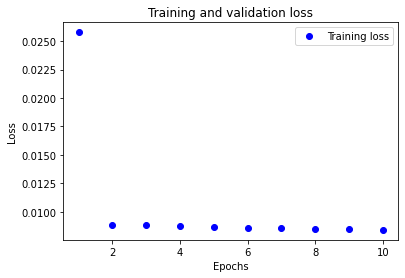

In [27]:
import matplotlib.pyplot as plt

print(history.history.keys())
loss = history.history['loss']
epochs = range(1, len(loss) + 1)

# bo = 파란색 점
plt.plot(epochs, loss, 'bo', label='Training loss') # plot x and y using blue circle markers
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [32]:
# Make predictions on the test data
predictions = model.predict(scaled_test_x)

print(predictions)

# invert normalized value
inverted_predictions = scaler_y.inverse_transform(predictions)
inverted_test_y = scaler_y.inverse_transform(scaled_test_y)

print(inverted_predictions)
print(inverted_test_y)

print(dataset[-3:]) # Get last 3 rows from the dataset

274/274 [==============================] - 0s 773us/step
[[0.50289243]
 [0.47488227]
 [0.47479814]
 ...
 [0.22087592]
 [0.2199961 ]
 [0.22230351]]
[[14.659083  ]
 [13.1185255 ]
 [13.113898  ]
 ...
 [-0.85182446]
 [-0.9002148 ]
 [-0.77330697]]
[[ 7.]
 [ 7.]
 [ 7.]
 ...
 [-3.]
 [-4.]
 [-3.]]
[[ -22.     -3.   1034.    242.7 ]
 [ -22.     -4.   1034.    246.72]
 [ -21.     -3.   1034.    249.85]]


In [35]:
# Calculate the mean squared error of the predictions
scaled_mse_error = ((predictions - scaled_test_y) ** 2).mean()

print("(Scaled) Mean Squared Error:", scaled_mse_error)

# Calculate the mean squared error of the predictions
inverted_mse_error = ((inverted_predictions - inverted_test_y) ** 2).mean()

print("(Inverted) Mean Squared Error:", inverted_mse_error)

(Scaled) Mean Squared Error: 0.01076668542852926
(Inverted) Mean Squared Error: 32.569222114651744


In [38]:
# Calculate the accuracy for one sample of the test data
value_error = np.absolute(inverted_predictions[0] - inverted_test_y[0])

# Wrong method to apply for the temperature
value_percent = 100 - (value_error * 100 / inverted_test_y[0])

print(value_error, "error,", value_percent, "% accuracy")

[7.65908337] error, [-9.41547666] % accuracy
